## Introduction

Welcome to Practical Machine Learning! This course focuses on developing the tools and techniques for understanding, building, and testing prediction functions.

These tools are at the center of the Data Science revolution. Many researchers, companies, and governmental organizations would like to use the cheap and abundant data they are collecting to predict what customers will like, what services to offer, or how to improve people's lives.

The emphasis of this course is hands on learning and implementation. If you like what you learn in this class, there are a large number of other Machine and Statistical Learning MOOCs that you can use to deepen your knowledge of the technical and mathematical details.

Please see the course syllabus for information about the quizzes, the project, and grading. Don't forget to say hi on the message boards. The community developed around these courses is one of the best places to learn and the best things about taking a MOOC!

Quizzes 2-4 require you to run specific packages. The package details are noted in the quizzes. Please make sure that you are running the right package to get the answers that we are looking for.

Jeff Leek and the Data Science Track Team

### Prediction motivation

### What is prediction?

**Components of a predictor**:  

question --> Input data --> features --> algorithm --> parameters --> evaluation

*SPAM EXAMPLE*

In [3]:
library(kernlab)
data(spam)
head(spam)

,make,address,all,num3d,our,over,remove,internet,order,mail,⋯,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
2,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
3,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
6,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam


In [4]:
str(spam)

'data.frame':	4601 obs. of  58 variables:
 $ make             : num  0 0.21 0.06 0 0 0 0 0 0.15 0.06 ...
 $ address          : num  0.64 0.28 0 0 0 0 0 0 0 0.12 ...
 $ all              : num  0.64 0.5 0.71 0 0 0 0 0 0.46 0.77 ...
 $ num3d            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ our              : num  0.32 0.14 1.23 0.63 0.63 1.85 1.92 1.88 0.61 0.19 ...
 $ over             : num  0 0.28 0.19 0 0 0 0 0 0 0.32 ...
 $ remove           : num  0 0.21 0.19 0.31 0.31 0 0 0 0.3 0.38 ...
 $ internet         : num  0 0.07 0.12 0.63 0.63 1.85 0 1.88 0 0 ...
 $ order            : num  0 0 0.64 0.31 0.31 0 0 0 0.92 0.06 ...
 $ mail             : num  0 0.94 0.25 0.63 0.63 0 0.64 0 0.76 0 ...
 $ receive          : num  0 0.21 0.38 0.31 0.31 0 0.96 0 0.76 0 ...
 $ will             : num  0.64 0.79 0.45 0.31 0.31 0 1.28 0 0.92 0.64 ...
 $ people           : num  0 0.65 0.12 0.31 0.31 0 0 0 0 0.25 ...
 $ report           : num  0 0.21 0 0 0 0 0 0 0 0 ...
 $ addresses        : num  0 0.14 1.75 0 0

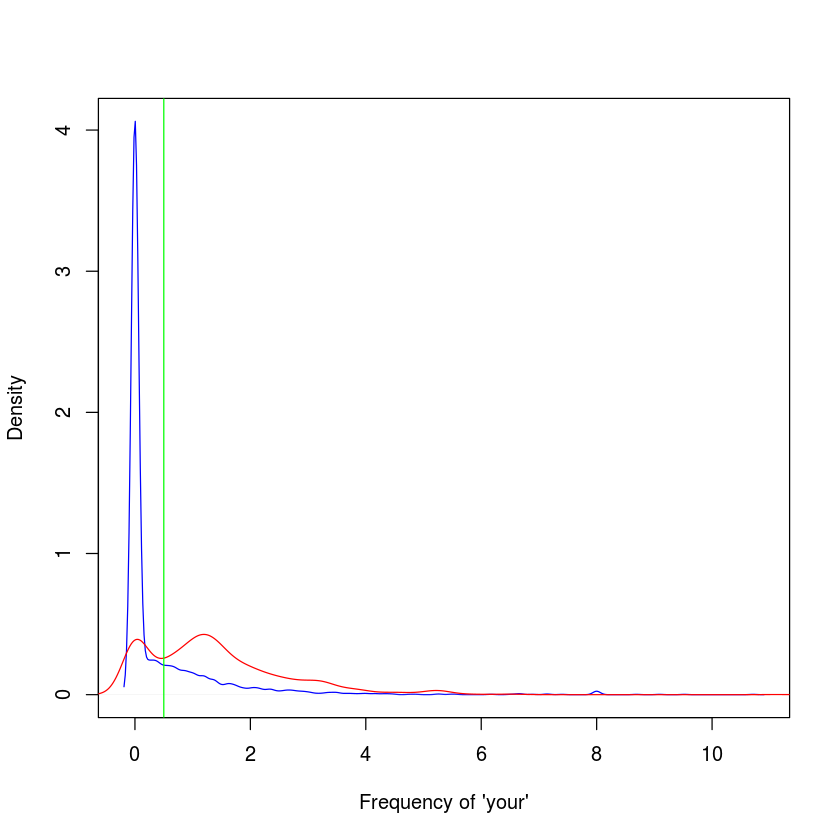

In [12]:
plot(density(spam$your[spam$type == 'nonspam'])
     , col="blue"
     , main = ''
     , xlab = "Frequency of 'your'"
     )
lines(density(spam$your[spam$type=='spam']), col = 'red')
abline(v = 0.5, col = 'green') # set up a cutoff line, so that if > 0.5, we predict it spam. if < 0.5, it's HAM

In [16]:
prediction <- ifelse(spam$your > 0.5, "spam", "nonspam")
table(prediction, spam$type)/length(spam$type)
# accuracy ~ 0.4590 + 0.2923 = 0.751

          
prediction   nonspam      spam
   nonspam 0.4590306 0.1017170
   spam    0.1469246 0.2923278

### Relative importance of steps


### In and Out of sample errors
#### In sample Error
- **In sample error**: the error rate you get on the same data set you used to build your predictor. Sometimes called **resubstititution error**
- **Out of sample error**: the error rate you get on a new data set. Sometimes called **generalization error**
- Key ideas
    - **Out of sample error** is what you care about
    - In sample error < out of sample error
    - The reason is **overfitting**
        - Matching your algorithum to the data you have

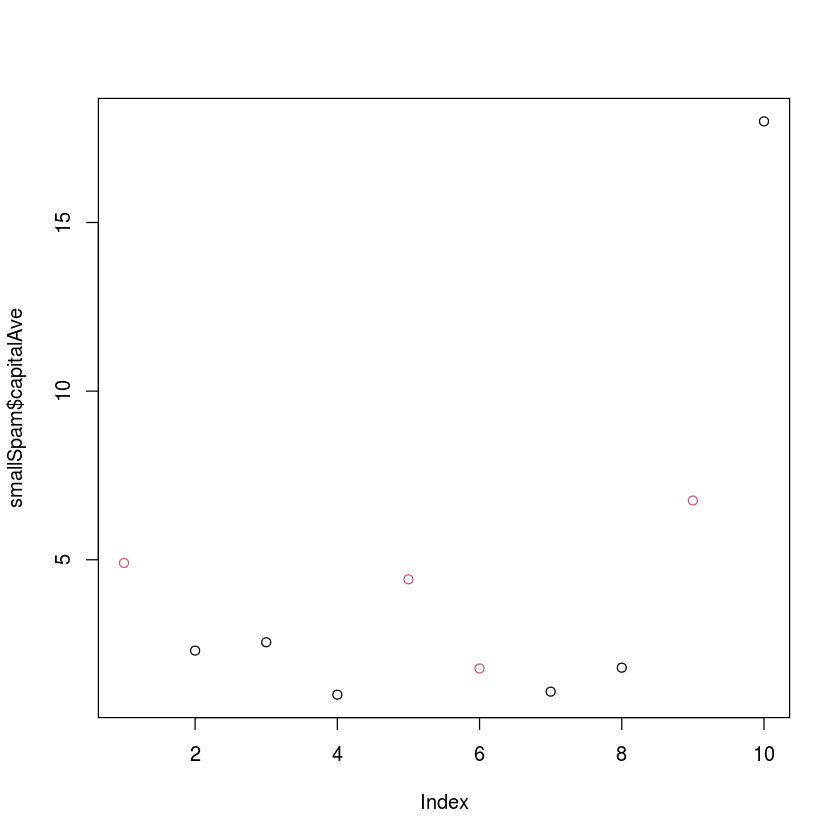

In [17]:
# In sample vs out of sample errors
library(kernlab)
data(spam)
set.seed(333)
smallSpam <- spam[sample(dim(spam)[1], size = 10), ]
spamLabel <- (smallSpam$type=="spam")*1 + 1
plot(smallSpam$capitalAve, col = spamLabel)

In [25]:
rule1(smallSpam$capitalAve)

[1] "spam"    "nonspam" "nonspam" "nonspam" "spam"    "nonspam" "nonspam"
 [8] "nonspam" "spam"    "spam"

In [24]:
# rule 1
rule1 <- function(x){
    prediction <- rep(NA, length(x))
    prediction[x > 2.7] <- 'spam'
    prediction[x < 2.4] <- 'nonspam'
    prediction[(x >= 2.40 & x <= 2.45)] <- 'spam'
    prediction[(x > 2.45 & x <= 2.70)] <- 'nonspam'
    return(prediction)
}
table(rule1(smallSpam$capitalAve), smallSpam$type)

         
          nonspam spam
  nonspam       5    1
  spam          1    3

Under rule1, the accuracy is about 0.8 for small sample size

In [29]:
# rule 1
rule2 <- function(x){
    prediction <- rep(NA, length(x))
    prediction[x > 2.8] <- 'spam'
    prediction[x <= 2.8] <- 'nonspam'
    #prediction[(x >= 2.40 & x <= 2.45)] <- 'spam'
    #prediction[(x > 2.45 & x <= 2.70)] <- 'nonspam'
    return(prediction)
}
table(rule2(smallSpam$capitalAve), smallSpam$type)

         
          nonspam spam
  nonspam       5    1
  spam          1    3

Under rule2, the accuracy is about 0.8 for small sample size

In [30]:
# apply rule1, rule2 to complete spam data
table(rule1(spam$capitalAve), spam$type)

         
          nonspam spam
  nonspam    2141  588
  spam        647 1225

In [31]:
table(rule2(spam$capitalAve), spam$type)

         
          nonspam spam
  nonspam    2224  642
  spam        564 1171

In [34]:
round(mean(rule1(spam$capitalAve) == spam$type), 4)

[1] 0.7316

In [35]:
round(mean(rule2(spam$capitalAve) == spam$type), 4)

[1] 0.7379

So that for the complete spam dataset, rule2 is more accurate than rule1 -- what is going on?
#### Overfitting
- Data has two parts
    - Signal
    - Noise
- The goal of a predictor is to find signal
- You can always design a perfect in-sample predictor
- You capture both signal + noise when you do that
- Predictor wont perform as well on new samples

### Prediction study design
1. Define your error rate
1. Split data into
    - Training, Testing, Validation (optional)
1. On the training set pick features
    - Use cross-validation
1. On the training set pick prediction function
    - Use cross-validation
1. If no validation
    - Apply 1x to test set
1. If validation
    - Apply test set and refine
    - Apply 1x to validation

### Type of Errors
In general, **Positive** = identified and **Negative** = rejected
- **True Positive**: correctly identified, e.g. sick people correctly diagnosed as sick
- **False positive**: incorrectly identified, e.g. healty people incorrectly diagnosed as sick
- **True negative**: correctly rejected, e.g. healty people correctly identified as healthy
- **False negative**: incorrectly rejected, e.g. sick people incorrectly identified as healthy


<img src="./data/1221074049.jpg" width = 600>

*Example*: Assume that some disease has 0.1% prevalence in the population. Assume we have a test kit for that disease that works with 99% sensitivity and 99% specifity. What is the probability of a person having the disease given the test result is positive, if we randomly select a subject from
- the genral population?
- a high risk sub-population with 10% disease prevalence?

#### For continous data
- **Mean squared error (MSE)**

$\frac{1}{n} \sum_{i=1}^{n} \left( \text{Prediction}_i - \text{Truth}_i\right)^2$

- **Root mean squared error (RMSE)**

$\sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \text{Prediction}_i - \text{Truth}_i\right)^2}$

#### Common error measures
1. MSE/RMSE
    - Continuous data, sensitive to outliers
1. Median absolute deviation
    - Continuous data, often more robust
1. Sensitivity (recall)
    - If you want few missed positives
1. Specifity
    - If you want few negatives called positives
1. Accuracy
    - Weights false positives / negatives equally
1. Concordance
    - One example is kappa 